Importing

In [1]:
# Install dependencies
!pip install -q kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import pandas as pd

# Download dataset (returns local directory path)
path = kagglehub.dataset_download("shaivyac/us-airline-dataset")

# List files in the dataset to see what’s available
print("Files downloaded:")
print(os.listdir(path))

# Now, load a specific file (replace with actual filename you see printed)
file_to_load = os.path.join(path, "Airline_dataset.csv")  # Corrected filename

# Load the dataset using pandas directly from the local path

df = pd.read_csv(file_to_load)


####
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%m/%d/%y')
cols = ["AIRLINE_ID", "FLIGHT_NUM", "ORIGIN_SEQ_ID","DEST_SEQ_ID"]
df[cols] = df[cols].astype(int)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)

#---
cols = ["AIRLINE_ID", "FLIGHT_NUM", "ORIGIN_SEQ_ID","DEST_SEQ_ID"]
df[cols] = df[cols].astype(int)

##################
df.loc[(df['WEATHER_DELAY'] >= 4.03) & (df['WEATHER_DELAY'] <= 4.04), 'WEATHER_DELAY'] = 0
#################
import pandas as pd
import requests
from io import StringIO

# -----------------------------
# 1. Download the airports data
# -----------------------------
url = "https://ourairports.com/data/airports.csv"
csv_data = requests.get(url).text
airports = pd.read_csv(StringIO(csv_data))

# -----------------------------
# 2. Your list of IATA codes
# -----------------------------
iata_codes = {
 'ABE','ABI','ABQ','ABR','ABY','ACK','ACT','ACV','ACY','ADK','ADQ','AEX','AGS','AKN','ALB','ALO',
 'ALW','AMA','ANC','APN','ART','ASE','ATL','ATW','ATY','AUS','AVL','AVP','AZA','AZO','BDL','BET',
 'BFF','BFL','BFM','BGM','BGR','BHM','BIL','BIS','BJI','BKG','BLI','BLV','BMI','BNA','BOI','BOS',
 'BPT','BQK','BQN','BRD','BRO','BRW','BTM','BTR','BTV','BUF','BUR','BWI','BZN','CAE','CAK','CDC',
 'CDV','CGI','CHA','CHO','CHS','CID','CIU','CKB','CLE','CLL','CLT','CMH','CMI','CMX','CNY','COD',
 'COS','COU','CPR','CRP','CRW','CSG','CVG','CWA','CYS','DAB','DAL','DAY','DBQ','DCA','DEN','DFW',
 'DHN','DIK','DLG','DLH','DRO','DRT','DSM','DTW','DUT','DVL','EAR','EAT','EAU','ECP','EGE','EKO',
 'ELM','ELP','ERI','ESC','EUG','EVV','EWN','EWR','EYW','FAI','FAR','FAT','FAY','FCA','FLG','FLL',
 'FLO','FNT','FSD','FSM','FWA','GCC','GCK','GEG','GFK','GGG','GJT','GNV','GPT','GRB','GRI','GRK',
 'GRR','GSO','GSP','GST','GTF','GTR','GUC','GUM','HDN','HGR','HHH','HIB','HLN','HNL','HOB','HOU',
 'HPN','HRL','HSV','HTS','HVN','HYA','HYS','IAD','IAG','IAH','ICT','IDA','ILM','IMT','IND','INL',
 'IPT','ISN','ISP','ITH','ITO','JAC','JAN','JAX','JFK','JHM','JLN','JMS','JNU','KOA','KTN','LAN',
 'LAR','LAS','LAW','LAX','LBB','LBE','LBF','LBL','LCH','LCK','LEX','LFT','LGA','LGB','LIH','LIT',
 'LNK','LNY','LRD','LSE','LWB','LWS','LYH','MAF','MBS','MCI','MCO','MDT','MDW','MEI','MEM','MFE',
 'MFR','MGM','MHK','MHT','MIA','MKE','MKG','MKK','MLB','MLI','MLU','MMH','MOB','MOT','MQT','MRY',
 'MSN','MSO','MSP','MSY','MTJ','MVY','MYR','OAJ','OAK','OGD','OGG','OGS','OKC','OMA','OME','ONT',
 'ORD','ORF','ORH','OTH','OTZ','OWB','PAE','PAH','PBG','PBI','PDX','PGD','PGV','PHF','PHL','PHX',
 'PIA','PIB','PIE','PIH','PIR','PIT','PLN','PNS','PPG','PQI','PRC','PSC','PSE','PSG','PSM','PSP',
 'PUB','PUW','PVD','PVU','PWM','RAP','RDD','RDM','RDU','RFD','RHI','RIC','RIW','RKS','RNO','ROA',
 'ROC','ROW','RST','RSW','SAF','SAN','SAT','SAV','SBA','SBN','SBP','SBY','SCC','SCE','SCK','SDF',
 'SEA','SFB','SFO','SGF','SGU','SHD','SHR','SHV','SIT','SJC','SJT','SJU','SLC','SLN','SMF','SMX',
 'SNA','SPI','SPN','SPS','SRQ','STC','STL','STS','STT','STX','SUN','SUX','SWF','SWO','SYR','TLH',
 'TOL','TPA','TRI','TTN','TUL','TUS','TVC','TWF','TXK','TYR','TYS','UIN','USA','VEL','VLD','VPS',
 'WRG','WYS','XNA','XWA','YAK','YKM','YUM'
}

# -----------------------------------------------------
# 3. Filter dataset to US airports with matching IATA
# -----------------------------------------------------
airports_us = airports[airports['iso_country'] == 'US']

filtered = airports_us[
    airports_us['iata_code'].isin(iata_codes)
][[
    'iata_code', 'name', 'municipality', 'iso_region',
    'latitude_deg', 'longitude_deg'
]]

# rename columns to cleaner names
filtered = filtered.rename(columns={
    'iata_code': 'IATA',
    'name': 'Airport_Name',
    'municipality': 'City',
    'iso_region': 'State',
    'latitude_deg': 'Latitude',
    'longitude_deg': 'Longitude'
})

# -----------------------------------------------------
# 4. Save to CSV
# -----------------------------------------------------
filtered.to_csv("airports_filtered.csv", index=False)

filtered.head()
#################
airlines_data = pd.read_csv('https://query.data.world/s/wpnzpdbcchgnj4vqacqww66vdhpovr?dws=00000')
###############
# Merge the main dataframe with the airlines description dataframe
df = pd.merge(df, airlines_data, left_on='AIRLINE_ID', right_on='Code', how='left')

# Rename the 'Description' column to 'Airline_Name' for clarity
df.rename(columns={'Description': 'Airline_Name'}, inplace=True)

# Optionally, drop the original 'AIRLINE_ID' and 'Code' columns if no longer needed
#df.drop(['AIRLINE_ID', 'Code'], axis=1, inplace=True)

# Display the first few rows to verify the changes
display(df.head())

100%|██████████| 22.1M/22.1M [00:00<00:00, 101MB/s] 

Extracting files...


Files downloaded:
['Airline_dataset.csv']


,Unnamed: 0,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_SEQ_ID,ORIGIN_AIRPORT,DEST_SEQ_ID,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,WEATHER_DELAY,Code,Airline_Name
0,0,2018-08-01,19805,N956AN,1587,1247805,JFK,1410702,PHX,1649.0,9.0,2006.0,44.0,0.0,19805,American Airlines Inc.: AA
1,1,2018-08-01,19805,N973AN,1588,1410702,PHX,1161802,EWR,1541.0,29.0,2350.0,53.0,0.0,19805,American Airlines Inc.: AA
2,2,2018-08-01,19805,N9006,1590,1104205,CLE,1129806,DFW,741.0,-3.0,938.0,-2.0,0.0,19805,American Airlines Inc.: AA
3,3,2018-08-01,19805,N870NN,1591,1484306,SJU,1129806,DFW,944.0,44.0,1347.0,43.0,0.0,19805,American Airlines Inc.: AA
4,4,2018-08-01,19805,N9023N,1593,1042302,AUS,1330303,MIA,556.0,-4.0,951.0,-2.0,0.0,19805,American Airlines Inc.: AA


In [3]:
airports_us

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83003,26366,Z92,small_airport,Harsens Island Airport,42.589699,-82.576401,578.0,NaN,US,US-MI,Harsens Island,no,NaN,NaN,Z92,Z92,NaN,NaN,NaN
83004,26367,Z93,small_airport,Copper Center 2 Airport,61.943713,-145.299398,1150.0,NaN,US,US-AK,Copper Center,no,NaN,CZC,NaN,Z93,NaN,https://en.wikipedia.org/wiki/Copper_Center_Ai...,NaN
83005,26368,Z95,small_airport,Cibecue Airport,34.001681,-110.455115,5037.0,NaN,US,US-AZ,Cibecue,no,NaN,NaN,NaN,Z95,NaN,https://en.wikipedia.org/wiki/Cibecue_Airport,NaN
83555,26369,ZNC,small_airport,Nyac Airport,60.980701,-159.994003,460.0,NaN,US,US-AK,Nyac,no,NaN,ZNC,ZNC,ZNC,NaN,https://en.wikipedia.org/wiki/Nyac_Airport,NaN


---

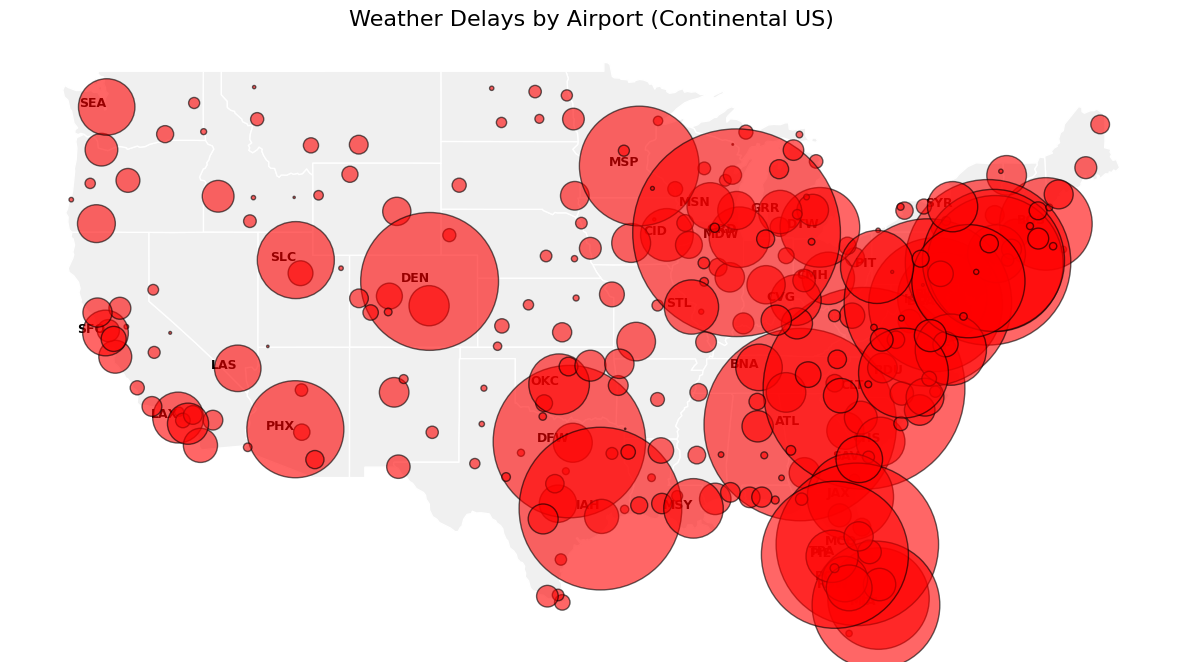

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# ---------------------------------------------------------
# 1. PREPARE YOUR DATA
# ---------------------------------------------------------
# (Assuming you have already loaded 'df' and 'airports_us')

# Aggregate delays by origin airport
airport_delays = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].sum().reset_index()

# Merge with the airports_us dataset to get coordinates (latitude/longitude)
# matching ORIGIN_AIRPORT to iata_code
map_data = airport_delays.merge(airports_us, left_on='ORIGIN_AIRPORT', right_on='iata_code')

# ---------------------------------------------------------
# 2. LOAD THE US MAP BACKGROUND
# ---------------------------------------------------------
# We use geopandas to read a GeoJSON file of US states.
# This URL is a common source for US state boundaries.
states_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
usa_map = gpd.read_file(states_url)

# Filter the map to only include the contiguous US (Mainland) for a better zoom
# (Excluding Hawaii and Alaska for this specific view, or you can keep them)
usa_map = usa_map[~usa_map['name'].isin(['Hawaii', 'Alaska', 'Puerto Rico'])]

# ---------------------------------------------------------
# 3. CREATE THE PROPORTIONAL SYMBOL MAP
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(15, 10))

# A. Plot the base map (US States)
usa_map.plot(ax=ax, color='#f0f0f0', edgecolor='white')

# B. Plot the airport data
# We filter map_data to exclude points outside the view (optional, but safer)
# Limits for continental US approx: Longitude -130 to -65, Latitude 20 to 55
plot_data = map_data[
    (map_data['longitude_deg'] > -130) & (map_data['longitude_deg'] < -65) &
    (map_data['latitude_deg'] > 20) & (map_data['latitude_deg'] < 55)
]

# Define the size of the circles
# We multiply by a factor (e.g., 0.1 or 0.5) to scale the bubbles appropriately
sizes = plot_data['WEATHER_DELAY'] * 0.5

# Plot the scatter points on top of the map
scatter = ax.scatter(
    plot_data['longitude_deg'],
    plot_data['latitude_deg'],
    s=sizes,              # Size determined by weather delay
    c='red',              # Color of the bubbles
    alpha=0.6,            # Transparency
    edgecolor='black',    # Border color of bubbles
    zorder=5              # Ensure bubbles are on top of the map
)

# ---------------------------------------------------------
# 4. FORMATTING
# ---------------------------------------------------------
ax.set_title('Weather Delays by Airport (Continental US)', fontsize=16)
ax.set_axis_off() # Turn off the box/axis numbers for a cleaner map look

# Add labels for top airports (optional)
for idx, row in plot_data.iterrows():
    # Only label if delay is significant to avoid clutter
    if row['WEATHER_DELAY'] > plot_data['WEATHER_DELAY'].mean():
        ax.text(
            row['longitude_deg'],
            row['latitude_deg'],
            row['ORIGIN_AIRPORT'],
            fontsize=9,
            fontweight='bold',
            ha='right'
        )

plt.show()

In [6]:
import plotly.express as px
import pandas as pd

# 1. PREPARE DATA
# ---------------------------------------------------------
# Aggregate weather delays by Origin Airport
airport_delays = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].sum().reset_index()

# Merge with airports_us to get coordinates and full airport names
# We join on 'ORIGIN_AIRPORT' (from flight data) and 'iata_code' (from airport data)
map_data = airport_delays.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT',
    right_on='iata_code'
)

# Filter out zero delays so the map isn't cluttered with empty points (optional)
map_data = map_data[map_data['WEATHER_DELAY'] > 0]

# 2. CREATE INTERACTIVE MAP
# ---------------------------------------------------------
fig = px.scatter_geo(
    map_data,
    lat="latitude_deg",
    lon="longitude_deg",

    # SIZE CONFIGURATION
    size="WEATHER_DELAY",                # Bubble size based on delay amount
    size_max=40,                         # Max size of the largest bubble (adjust as needed)

    # HOVER / TOOLTIP CONFIGURATION
    hover_name="ORIGIN_AIRPORT",         # Title of the tooltip (IATA Code)
    hover_data={
        "latitude_deg": False,           # Hide lat/lon from tooltip (cleaner)
        "longitude_deg": False,
        "WEATHER_DELAY": ":,2f",         # Format number (optional)
        "name": True                     # Show full airport name
    },

    # MAP CONFIGURATION
    scope="usa",                         # Limit map to USA
    title="Total Weather Delays by Airport (Interactive)",
    color="WEATHER_DELAY",               # Optional: Color bubbles by severity too
    color_continuous_scale="Reds"        # Color scale from light to dark red
)

# 3. DISPLAY
# ---------------------------------------------------------
fig.show()

In [11]:
import pandas as pd
import plotly.graph_objects as go

# ---------------------------------------------------------
# 1. PREPARE DATA
# ---------------------------------------------------------
# Calculate Sum (Total) and Mean (Average)
stats = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean']).reset_index()
stats.columns = ['ORIGIN_AIRPORT', 'Total_Delay', 'Avg_Delay']

# Merge with Airport Coordinates
map_data = stats.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT',
    right_on='iata_code'
)

# Filter out airports with 0 delays
map_data = map_data[map_data['Total_Delay'] > 0]

# ---------------------------------------------------------
# 2. CALCULATE BUBBLE SIZES
# ---------------------------------------------------------
# Create normalized sizes for visualization so dots aren't too big or small
# We multiply by a scaling factor (e.g., 50) to get pixel sizes
map_data['Size_Total'] = map_data['Total_Delay'] / map_data['Total_Delay'].max() * 200 #MODIFY THE SIZE OF THE MARKER
map_data['Size_Avg'] = map_data['Avg_Delay'] / map_data['Avg_Delay'].max() * 200 #MODIFY THE SIZE OF THE MARKER

# ---------------------------------------------------------
# 3. BUILD THE INTERACTIVE MAP
# ---------------------------------------------------------
fig = go.Figure()

# Add the initial Trace (Defaulting to Total Delay)
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = map_data['longitude_deg'],
    lat = map_data['latitude_deg'],
    text = map_data['name'] + '<br>Code: ' + map_data['ORIGIN_AIRPORT'],

    # Define the visual markers
    marker = dict(
        size = map_data['Size_Total'],
        color = map_data['Total_Delay'],
        colorscale = 'Reds',
        colorbar_title = "Minutes",
        line_color='rgb(40,40,40)',
        line_width=2.5,
        sizemode = 'area'
    ),
    # Custom Hover Data
    customdata = map_data[['Total_Delay', 'Avg_Delay']],
    hovertemplate = (
        "<b>%{text}</b><br>" +
        "Total Delay: %{customdata[0]:,.0f} min<br>" +
        "Avg Delay: %{customdata[1]:.1f} min<br>" +
        "<extra></extra>"
    )
))

# ---------------------------------------------------------
# 4. ADD BUTTONS (UPDATE MENUS)
# ---------------------------------------------------------
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                # BUTTON 1: TOTAL DELAYS
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Total']],
                        "marker.color": [map_data['Total_Delay']],
                    }],
                    label="Show Total Delays",
                    method="restyle"
                ),
                # BUTTON 2: AVERAGE DELAYS
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Avg']],
                        "marker.color": [map_data['Avg_Delay']],
                    }],
                    label="Show Average Delays",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# ---------------------------------------------------------
# 5. FINAL LAYOUT SETTINGS
# ---------------------------------------------------------
fig.update_layout(
    title_text="Weather Delays Analysis (Switchable View)",
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = "rgb(217, 217, 217)",
        # REMOVED INVALID PARAMETER HERE
    ),
)

fig.show()

In [13]:
import pandas as pd
import plotly.graph_objects as go




# ---------------------------------------------------------
# 1. PREPARE DATA
# ---------------------------------------------------------
# Calculate Sum (Total), Mean (Average), and Median
# We add 'median' to the list of aggregators
stats = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats.columns = ['ORIGIN_AIRPORT', 'Total_Delay', 'Avg_Delay', 'Median_Delay']

# Merge with Airport Coordinates
map_data = stats.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT',
    right_on='iata_code'
)

# Filter out airports with 0 total delay
map_data = map_data[map_data['Total_Delay'] > 0]

# ---------------------------------------------------------
# 2. CALCULATE BUBBLE SIZES
# ---------------------------------------------------------
# We create a size column for Median as well.
# Using the larger multiplier (300) as requested previously.

map_data['Size_Total'] = map_data['Total_Delay'] / map_data['Total_Delay'].max() * 300
map_data['Size_Avg'] = map_data['Avg_Delay'] / map_data['Avg_Delay'].max() * 300
map_data['Size_Median'] = map_data['Median_Delay'] / map_data['Median_Delay'].max() * 30000

# Handle potential NaN/0 issues for median (if max is 0)
map_data['Size_Median'] = map_data['Size_Median'].fillna(0)

# ---------------------------------------------------------
# 3. BUILD THE INTERACTIVE MAP
# ---------------------------------------------------------
fig = go.Figure()

# Add the initial Trace (Defaulting to Total Delay)
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = map_data['longitude_deg'],
    lat = map_data['latitude_deg'],
    text = map_data['name'] + '<br>Code: ' + map_data['ORIGIN_AIRPORT'],

    # Define the visual markers
    marker = dict(
        size = map_data['Size_Total'],
        color = map_data['Total_Delay'],
        colorscale = 'Reds',
        colorbar_title = "Minutes",
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode = 'area'
    ),
    # Custom Hover Data (Now includes Median at index 2)
    customdata = map_data[['Total_Delay', 'Avg_Delay', 'Median_Delay']],
    hovertemplate = (
        "<b>%{text}</b><br>" +
        "Total Delay: %{customdata[0]:,.0f} min<br>" +
        "Avg Delay: %{customdata[1]:.1f} min<br>" +
        "Median Delay: %{customdata[2]:.1f} min<br>" +
        "<extra></extra>"
    )
))

# ---------------------------------------------------------
# 4. ADD 3 BUTTONS
# ---------------------------------------------------------
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                # BUTTON 1: TOTAL
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Total']],
                        "marker.color": [map_data['Total_Delay']],
                    }],
                    label="Total",
                    method="restyle"
                ),
                # BUTTON 2: AVERAGE
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Avg']],
                        "marker.color": [map_data['Avg_Delay']],
                    }],
                    label="Average",
                    method="restyle"
                ),
                # BUTTON 3: MEDIAN
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Median']],
                        "marker.color": [map_data['Median_Delay']],
                    }],
                    label="Median",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# ---------------------------------------------------------
# 5. FINAL LAYOUT
# ---------------------------------------------------------
fig.update_layout(
    title_text="Weather Delays: Total vs Average vs Median",
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = "rgb(217, 217, 217)",
    ),
)

fig.show()

In [14]:
import pandas as pd
import plotly.graph_objects as go

# ---------------------------------------------------------
# 1. PREPARE DATA
# ---------------------------------------------------------

# A. Filter data FIRST to exclude 0 delays
# This ensures Mean and Median only calculate based on actual weather events.
weather_events = df[df['WEATHER_DELAY'] > 0].copy()

# B. Aggregate statistics
stats = weather_events.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats.columns = ['ORIGIN_AIRPORT', 'Total_Delay', 'Avg_Delay', 'Median_Delay']

# C. Merge with Airport Coordinates
map_data = stats.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT',
    right_on='iata_code'
)

# ---------------------------------------------------------
# 2. CALCULATE BUBBLE SIZES
# ---------------------------------------------------------
# Normalize the data to get pixel sizes.
# Multiplier set to 300 to make bubbles large and visible.
map_data['Size_Total'] = map_data['Total_Delay'] / map_data['Total_Delay'].max() * 300
map_data['Size_Avg'] = map_data['Avg_Delay'] / map_data['Avg_Delay'].max() * 300
map_data['Size_Median'] = map_data['Median_Delay'] / map_data['Median_Delay'].max() * 300

# ---------------------------------------------------------
# 3. BUILD THE INTERACTIVE MAP
# ---------------------------------------------------------
fig = go.Figure()

# Add the single trace (initially showing Total Delay)
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = map_data['longitude_deg'],
    lat = map_data['latitude_deg'],
    text = map_data['name'] + '<br>Code: ' + map_data['ORIGIN_AIRPORT'],

    # Marker configuration
    marker = dict(
        size = map_data['Size_Total'],      # Start with Total sizes
        color = map_data['Total_Delay'],    # Start with Total colors
        colorscale = 'Reds',
        colorbar_title = "Minutes",
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode = 'area'
    ),

    # Hover data configuration
    customdata = map_data[['Total_Delay', 'Avg_Delay', 'Median_Delay']],
    hovertemplate = (
        "<b>%{text}</b><br>" +
        "Total Delay: %{customdata[0]:,.0f} min<br>" +
        "Avg Delay: %{customdata[1]:.1f} min<br>" +
        "Median Delay: %{customdata[2]:.1f} min<br>" +
        "<extra></extra>"
    )
))

# ---------------------------------------------------------
# 4. ADD UPDATE MENUS (BUTTONS)
# ---------------------------------------------------------
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                # BUTTON 1: TOTAL
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Total']],
                        "marker.color": [map_data['Total_Delay']],
                        "marker.colorbar.title": "Total Mins"
                    }],
                    label="Total",
                    method="restyle"
                ),
                # BUTTON 2: AVERAGE (Of Non-Zero Delays)
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Avg']],
                        "marker.color": [map_data['Avg_Delay']],
                        "marker.colorbar.title": "Avg Mins"
                    }],
                    label="Average",
                    method="restyle"
                ),
                # BUTTON 3: MEDIAN (Of Non-Zero Delays)
                dict(
                    args=[{
                        "marker.size": [map_data['Size_Median']],
                        "marker.color": [map_data['Median_Delay']],
                        "marker.colorbar.title": "Median Mins"
                    }],
                    label="Median",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# ---------------------------------------------------------
# 5. FINAL LAYOUT
# ---------------------------------------------------------
fig.update_layout(
    title_text="Weather Delays (Calculated on delayed flights only)",
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = "rgb(217, 217, 217)",
    ),
)

fig.show()

In [15]:
import pandas as pd
import plotly.graph_objects as go

# ---------------------------------------------------------
# 1. DATA PREPARATION
# ---------------------------------------------------------

# Ensure Weather Delay is 0 if NaN for calculation purposes
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)

# --- DATASET A: Weather Delays ---
# Filter: Only rows where Weather Delay exists
df_weather = df[df['WEATHER_DELAY'] > 0].copy()
stats_weather = df_weather.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_weather.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

# Merge Weather Data with Coordinates
map_weather = stats_weather.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# --- DATASET B: Non-Weather Arrival Delays ---
# Filter: Arr Delay > 0 AND Weather Delay == 0
# This captures delays caused by other factors (Carrier, NAS, Late Aircraft, etc.)
df_other = df[(df['ARR_DELAY'] > 0) & (df['WEATHER_DELAY'] == 0)].copy()
stats_other = df_other.groupby('ORIGIN_AIRPORT')['ARR_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_other.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

# Merge Other Data with Coordinates
map_other = stats_other.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# ---------------------------------------------------------
# 2. CALCULATE SIZES (SCALING)
# ---------------------------------------------------------
# We scale both datasets independently so they both look good on the map
# Multiplier = 300 for visibility

def calculate_sizes(dataset):
    # Helper function to avoid repeating code
    s_total = dataset['Total'] / dataset['Total'].max() * 300
    s_avg = dataset['Avg'] / dataset['Avg'].max() * 300
    s_med = dataset['Median'] / dataset['Median'].max() * 300
    return s_total, s_avg, s_med

w_size_tot, w_size_avg, w_size_med = calculate_sizes(map_weather)
o_size_tot, o_size_avg, o_size_med = calculate_sizes(map_other)

# ---------------------------------------------------------
# 3. BUILD THE MAP WITH TWO TRACES
# ---------------------------------------------------------
fig = go.Figure()

# --- TRACE 0: WEATHER DELAYS (Visible by default) ---
fig.add_trace(go.Scattergeo(
    lon = map_weather['longitude_deg'],
    lat = map_weather['latitude_deg'],
    text = map_weather['name'] + '<br>Code: ' + map_weather['ORIGIN_AIRPORT'],
    visible = True, # This one starts visible
    name = "Weather Delays",
    marker = dict(
        size = w_size_tot,
        color = map_weather['Total'],
        colorscale = 'Reds',
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = map_weather[['Total', 'Avg', 'Median']],
    hovertemplate = "<b>Weather Delay</b><br>%{text}<br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# --- TRACE 1: OTHER DELAYS (Hidden by default) ---
fig.add_trace(go.Scattergeo(
    lon = map_other['longitude_deg'],
    lat = map_other['latitude_deg'],
    text = map_other['name'] + '<br>Code: ' + map_other['ORIGIN_AIRPORT'],
    visible = False, # This one starts hidden
    name = "Non-Weather Delays",
    marker = dict(
        size = o_size_tot,
        color = map_other['Total'],
        colorscale = 'Blues', # Different color scheme for distinction
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = map_other[['Total', 'Avg', 'Median']],
    hovertemplate = "<b>Non-Weather Delay</b><br>%{text}<br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# ---------------------------------------------------------
# 4. CREATE DOUBLE SLICERS
# ---------------------------------------------------------
fig.update_layout(
    updatemenus=[
        # --- SLICER 1: CHOOSE DATA TYPE (Weather vs Other) ---
        dict(
            type="buttons",
            direction="left",
            x=0.05, y=1.15,
            active=0,
            buttons=list([
                dict(label="Show Weather Delays",
                     method="update",
                     args=[{"visible": [True, False]}, # Show Trace 0, Hide Trace 1
                           {"title": "Analysis: Weather Delays"}]),
                dict(label="Show Non-Weather Delays",
                     method="update",
                     args=[{"visible": [False, True]}, # Hide Trace 0, Show Trace 1
                           {"title": "Analysis: Non-Weather Arrival Delays"}]),
            ]),
        ),

        # --- SLICER 2: CHOOSE METRIC (Total vs Avg vs Median) ---
        dict(
            type="buttons",
            direction="down",
            x=0.05, y=0.8, # Positioned on the left side
            active=0,
            buttons=list([
                # BUTTON: TOTAL
                dict(label="Total",
                     method="restyle",
                     # We pass a list of 2 arrays for every property: [Value_for_Trace0, Value_for_Trace1]
                     args=[{
                         "marker.size": [w_size_tot, o_size_tot],
                         "marker.color": [map_weather['Total'], map_other['Total']],
                         "marker.colorbar.title": "Total Mins"
                     }]),
                # BUTTON: AVERAGE
                dict(label="Average",
                     method="restyle",
                     args=[{
                         "marker.size": [w_size_avg, o_size_avg],
                         "marker.color": [map_weather['Avg'], map_other['Avg']],
                         "marker.colorbar.title": "Avg Mins"
                     }]),
                # BUTTON: MEDIAN
                dict(label="Median",
                     method="restyle",
                     args=[{
                         "marker.size": [w_size_med, o_size_med],
                         "marker.color": [map_weather['Median'], map_other['Median']],
                         "marker.colorbar.title": "Median Mins"
                     }]),
            ]),
        )
    ]
)

# ---------------------------------------------------------
# 5. FINAL LAYOUT
# ---------------------------------------------------------
fig.update_layout(
    title_text="Analysis: Weather Delays",
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = "rgb(230, 230, 230)",
    ),
    margin=dict(t=100, l=0, r=0, b=0)
)

fig.show()

In [20]:
import pandas as pd
import plotly.graph_objects as go

# ---------------------------------------------------------
# 1. DATA PREPARATION
# ---------------------------------------------------------

# Ensure Weather Delay is 0 if NaN
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)

# --- DATASET A: Weather Delays ---
df_weather = df[df['WEATHER_DELAY'] > 0].copy()
stats_weather = df_weather.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_weather.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

map_weather = stats_weather.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# --- DATASET B: Non-Weather Arrival Delays ---
df_other = df[(df['ARR_DELAY'] > 0) & (df['WEATHER_DELAY'] == 0)].copy()
stats_other = df_other.groupby('ORIGIN_AIRPORT')['ARR_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_other.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

map_other = stats_other.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# ---------------------------------------------------------
# 2. CRITICAL STEP: CONVERT EVERYTHING TO LISTS
# ---------------------------------------------------------
# We convert the Series to lists HERE to prevent any "ambiguous truth value" errors later.

# Sizes Helper Function
def get_size_list(dataset, col, multiplier=300):
    if dataset.empty: return []
    # Normalize and convert to list immediately
    values = dataset[col]
    norm = values / values.max() * multiplier
    return norm.fillna(0).tolist()

# Weather Lists
w_lon = map_weather['longitude_deg'].tolist()
w_lat = map_weather['latitude_deg'].tolist()
w_txt = (map_weather['name'] + '<br>Code: ' + map_weather['ORIGIN_AIRPORT']).tolist()
w_custom = map_weather[['Total', 'Avg', 'Median']].values # Arrays are safe for customdata

w_size_tot = get_size_list(map_weather, 'Total')
w_size_avg = get_size_list(map_weather, 'Avg')
w_size_med = get_size_list(map_weather, 'Median')

w_col_tot = map_weather['Total'].tolist()
w_col_avg = map_weather['Avg'].tolist()
w_col_med = map_weather['Median'].tolist()

# Other Lists
o_lon = map_other['longitude_deg'].tolist()
o_lat = map_other['latitude_deg'].tolist()
o_txt = (map_other['name'] + '<br>Code: ' + map_other['ORIGIN_AIRPORT']).tolist()
o_custom = map_other[['Total', 'Avg', 'Median']].values

o_size_tot = get_size_list(map_other, 'Total')
o_size_avg = get_size_list(map_other, 'Avg')
o_size_med = get_size_list(map_other, 'Median')

o_col_tot = map_other['Total'].tolist()
o_col_avg = map_other['Avg'].tolist()
o_col_med = map_other['Median'].tolist()

# ---------------------------------------------------------
# 3. BUILD THE MAP
# ---------------------------------------------------------
fig = go.Figure()

# --- TRACE 0: WEATHER DELAYS ---
fig.add_trace(go.Scattergeo(
    lon = w_lon, lat = w_lat, text = w_txt,
    visible = True,
    name = "Weather Delays",
    marker = dict(
        size = w_size_tot,      # Using the pre-converted LIST
        color = w_col_tot,      # Using the pre-converted LIST
        colorscale = 'Reds',
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = w_custom,
    hovertemplate = "<b>Weather Delay</b><br>%{text}<br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# --- TRACE 1: OTHER DELAYS ---
fig.add_trace(go.Scattergeo(
    lon = o_lon, lat = o_lat, text = o_txt,
    visible = False,
    name = "Non-Weather Delays",
    marker = dict(
        size = o_size_tot,      # Using the pre-converted LIST
        color = o_col_tot,      # Using the pre-converted LIST
        colorscale = 'Blues',
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = o_custom,
    hovertemplate = "<b>Non-Weather Delay</b><br>%{text}<br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# ---------------------------------------------------------
# 4. LAYOUT & BUTTONS
# ---------------------------------------------------------
fig.update_layout(
    width=1000, height=600,
    title={'text': "Analysis: Weather vs Non-Weather Delays", 'y':0.95, 'x':0.5, 'xanchor':'center'},
    geo = dict(scope='usa', projection_type='albers usa', showland=True, landcolor="rgb(230, 230, 230)"),
    margin=dict(t=50, l=0, r=0, b=0),

    updatemenus=[
        # SLICER 1: DATA TYPE
        dict(
            type="buttons", direction="left", x=0.01, y=1.0, xanchor="left", yanchor="top",
            bgcolor="rgba(255, 255, 255, 0.9)",
            buttons=list([
                dict(label="Weather Only", method="update",
                     args=[{"visible": [True, False]}, {"title": "Analysis: Weather Delays"}]),
                dict(label="Non-Weather", method="update",
                     args=[{"visible": [False, True]}, {"title": "Analysis: Non-Weather Arrival Delays"}]),
            ]),
        ),
        # SLICER 2: METRIC (Total / Avg / Median)
        dict(
            type="buttons", direction="left", x=0.01, y=0.01, xanchor="left", yanchor="bottom",
            bgcolor="rgba(255, 255, 255, 0.9)",
            active=2, # Default to 'Total' (Last item below)
            buttons=list([
                dict(label="Median", method="restyle",
                     args=[{
                         "marker.size": [w_size_med, o_size_med],   # Passing LISTS
                         "marker.color": [w_col_med, o_col_med],    # Passing LISTS
                         "marker.colorbar.title": "Median Mins"
                     }]),
                dict(label="Average", method="restyle",
                     args=[{
                         "marker.size": [w_size_avg, o_size_avg],
                         "marker.color": [w_col_avg, o_col_avg],
                         "marker.colorbar.title": "Avg Mins"
                     }]),
                dict(label="Total", method="restyle",
                     args=[{
                         "marker.size": [w_size_tot, o_size_tot],
                         "marker.color": [w_col_tot, o_col_tot],
                         "marker.colorbar.title": "Total Mins"
                     }]),
            ]),
        )
    ]
)

fig.show()

In [25]:
import pandas as pd
import plotly.graph_objects as go

# ---------------------------------------------------------
# 1. DATA PREPARATION (SAME AS BEFORE)
# ---------------------------------------------------------

# Ensure Weather Delay is 0 if NaN
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)

# --- DATASET A: Weather Delays ---
df_weather = df[df['WEATHER_DELAY'] > 0].copy()
stats_weather = df_weather.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_weather.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

map_weather = stats_weather.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# --- DATASET B: Non-Weather Arrival Delays ---
df_other = df[(df['ARR_DELAY'] > 0) & (df['WEATHER_DELAY'] == 0)].copy()
stats_other = df_other.groupby('ORIGIN_AIRPORT')['ARR_DELAY'].agg(['sum', 'mean', 'median']).reset_index()
stats_other.columns = ['ORIGIN_AIRPORT', 'Total', 'Avg', 'Median']

map_other = stats_other.merge(
    airports_us[['iata_code', 'latitude_deg', 'longitude_deg', 'name']],
    left_on='ORIGIN_AIRPORT', right_on='iata_code'
)

# ---------------------------------------------------------
# 2. CALCULATE SIZES (CONVERT TO LISTS)
# ---------------------------------------------------------
def get_size_list(dataset, col, multiplier=800):   #WE MODIFY THE SIZE WITH MULTIPLIER
    if dataset.empty: return []
    values = dataset[col]
    # Normalize
    norm = values / values.max() * multiplier
    return norm.fillna(0).tolist()

# Extract Coordinates & Text
w_lon = map_weather['longitude_deg'].tolist()
w_lat = map_weather['latitude_deg'].tolist()
w_txt = (map_weather['name'] + '<br>Code: ' + map_weather['ORIGIN_AIRPORT']).tolist()
w_custom = map_weather[['Total', 'Avg', 'Median']].values

# Extract Sizes
w_size_tot = get_size_list(map_weather, 'Total')
w_size_avg = get_size_list(map_weather, 'Avg')
w_size_med = get_size_list(map_weather, 'Median')

o_lon = map_other['longitude_deg'].tolist()
o_lat = map_other['latitude_deg'].tolist()
o_txt = (map_other['name'] + '<br>Code: ' + map_other['ORIGIN_AIRPORT']).tolist()
o_custom = map_other[['Total', 'Avg', 'Median']].values

o_size_tot = get_size_list(map_other, 'Total')
o_size_avg = get_size_list(map_other, 'Avg')
o_size_med = get_size_list(map_other, 'Median')

# ---------------------------------------------------------
# 3. BUILD THE MAP
# ---------------------------------------------------------
fig = go.Figure()

# --- TRACE 0: WEATHER DELAYS ---
fig.add_trace(go.Scattergeo(
    lon = w_lon, lat = w_lat, text = w_txt,
    visible = True,
    name = "Weather Delays",
    marker = dict(
        size = w_size_tot,
        color = 'firebrick',    # STATIC COLOR (No List)
        opacity = 0.6,          # Add transparency to see overlaps
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = w_custom,
    hovertemplate = "<b>%{text}</b><br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# --- TRACE 1: OTHER DELAYS ---
fig.add_trace(go.Scattergeo(
    lon = o_lon, lat = o_lat, text = o_txt,
    visible = False,
    name = "Non-Weather Delays",
    marker = dict(
        size = o_size_tot,
        color = 'royalblue',    # STATIC COLOR (No List)
        opacity = 0.6,
        sizemode = 'area',
        line_width=0.5, line_color='black'
    ),
    customdata = o_custom,
    hovertemplate = "<b>%{text}</b><br>Total: %{customdata[0]:,.0f}m<br>Avg: %{customdata[1]:.1f}m<br>Med: %{customdata[2]:.1f}m<extra></extra>"
))

# ---------------------------------------------------------
# 4. LAYOUT & BUTTONS
# ---------------------------------------------------------
fig.update_layout(
    width=1000, height=600,
    title={'text': "Delay Analysis", 'y':0.95, 'x':0.5, 'xanchor':'center'},
    geo = dict(scope='usa', projection_type='albers usa', showland=True, landcolor="rgb(230, 230, 230)"),
    margin=dict(t=50, l=0, r=0, b=0),

    updatemenus=[
        # SLICER 1: DATA TYPE
        dict(
            type="buttons", direction="left", x=0.01, y=1.0, xanchor="left", yanchor="top",
            bgcolor="rgba(255, 255, 255, 0.9)",
            buttons=list([
                dict(label="Weather Only", method="update",
                     args=[{"visible": [True, False]}, {"title": "Analysis: Weather Delays"}]),
                dict(label="Non-Weather", method="update",
                     args=[{"visible": [False, True]}, {"title": "Analysis: Non-Weather Arrival Delays"}]),
            ]),
        ),
        # SLICER 2: METRIC (Size Only)
        dict(
            type="buttons", direction="left", x=0.01, y=0.01, xanchor="left", yanchor="bottom",
            bgcolor="rgba(255, 255, 255, 0.9)",
            active=2,
            buttons=list([
                dict(label="Median", method="restyle",
                     args=[{ "marker.size": [w_size_med, o_size_med] }]), # Update Size Only
                dict(label="Average", method="restyle",
                     args=[{ "marker.size": [w_size_avg, o_size_avg] }]), # Update Size Only
                dict(label="Total", method="restyle",
                     args=[{ "marker.size": [w_size_tot, o_size_tot] }]), # Update Size Only
            ]),
        )
    ]
)

fig.show()

# Best airline for a given route
